<a href="https://colab.research.google.com/github/danielreinaux/DataAnalytics/blob/main/analise_farmaceutica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de Consumo de Medicamentos Industrializados

O propósito principal desta análise é explorar e entender os padrões e tendências no consumo de medicmanetos instrudializados. Nosso foco será desvendar insights acerca da utilização deste produto, observando variáveis como cateogiras de medicamentos, volume de consumo, e regiões de distribuição predominantes

* **Compreender padrões de consumo**: Vamos examinar os dados disponíveis para identificar quais são os medicamentos industrializados mais consumidos, oferecendo uma visao detalhada sobre quais os produtos são mais demandandos pela população

* **Investigar Categorias e Variedades**: Buscaremos insights sobre as diferentes categorias de medicamentos presentes no dataset, avaliando a diversidade e especificidades de cada uma, para entender quais classes de medicamentos são mais prevalentes.

* **Identificar Regiões de Maior Consumo**: Exploraremos as variáveis geográficas disponíveis para descobrir em quais regiões ou estados a demanda por medicamentos industrializados é mais acentuada, o que nos permitirá visualizar discrepâncias regionais no consumo destes produtos.

* **Promover Saúde Pública e Acesso a Medicamentos**: A partir das descobertas desta análise, procuraremos fornecer recomendações para melhorar o acesso a medicamentos essenciais e promover a saúde pública, focando em estratégias para equalizar a distribuição de medicamentos em diferentes regiões e otimizar a disponibilidade de variedades de medicamentos conforme a necessidade populacional.

###1. Obtenção dos dados

Amostra dos dados coletados do Portal de Dados Aberta do Gov.br, do período de Novembro de 2021.                 
É uma amostra de uma fonte oficial e pública, que contém registros do medicamentos e tudo envolvido nesse período de tempo.

In [ ]:
import pandas as pd
import seaborn as sns
import calendar
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

df_med = pd.read_csv('/content/EDA_Industrializados_202111_sample.csv')

**Dicionário das variáveis**

* `Unnamed` - Número de identificação único para cada registro no conjunto de dados.
* `ANO_VENDA`: Representa o ano em que a venda do medicamento foi realizada.
* `MES_VENDA`: Representa o mês em que a venda do medicamento foi realizada.
* `UF_VENDA`: Denota a Unidade Federativa onde o medicamento foi vendido.
* `MUNICIPIO_VENDA`: Indica o município onde ocorreu a venda do medicamento.
* `PRINCIPIO_ATIVO`: Refere-se à substância ativa contida no medicamento vendido.
* `DESCRICAO_APRESENTACAO`: Fornece uma descrição detalhada da apresentação do medicamento, possivelmente indicando a forma farmacêutica e a concentração.
* `QTD_VENDIDA`: Quantifica a quantidade do medicamento que foi vendida.
* `UNIDADE_MEDIDA`: Especifica a unidade de medida utilizada para quantificar a quantidade vendida do medicamento, podendo ser gramas, miligramas, unidades, entre outras.
* `CONSELHO_PRESCRITOR`: Denota o conselho ou entidade responsável por prescrever o medicamento.
* `UF_CONSELHO_PRESCRITOR`: Indica a Unidade Federativa do conselho ou entidade que prescreveu o medicamento.
* `TIPO_RECEITUARIO`: Esclarece o tipo de receituário utilizado para a venda do medicamento, identificando, por exemplo, se trata-se de um medicamento controlado.
* `CID10`: Refere-se ao código da Classificação Internacional de Doenças - 10ª Revisão, que pode indicar a condição de saúde para a qual o medicamento foi prescrito.
* `SEXO`: Informa o sexo do indivíduo para o qual o medicamento foi prescrito ou do comprador do medicamento.
* `IDADE`: Especifica a idade do indivíduo para o qual o medicamento foi prescrito.
* `UNIDADE_IDADE`: Define a unidade de medida da idade, que pode variar, sendo anos, meses, etc.



In [ ]:
#5 primeiras linhas
df_med.head(5)

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,5310,2021,11,CE,FORTALEZA,OXCARBAZEPINA,300 MG COM REV CT BL AL AL X 30,3,CAIXA,CRM,CE,1.0,NaN,NaN,NaN,NaN
1,3356,2021,11,RJ,RIO DE JANEIRO,CLORIDRATO DE MOXIFLOXACINO,5 MG/ML SOL OFT CT FR PLAS TRANS GOT X 5 ML,1,CAIXA,CRM,RJ,5.0,NaN,2.0,50.0,1.0
2,137131,2021,11,RJ,RIO DE JANEIRO,SULFADIAZINA DE PRATA,10 MG / G CREM DERM CT BG AL REV X 50 G,2,CAIXA,CRM,RJ,5.0,NaN,2.0,75.0,1.0
3,202348,2021,11,PR,ROLÂNDIA,ALPRAZOLAM,2 MG COM CT BL AL PLAS INC X 30,4,FRASCO,CRM,PR,2.0,NaN,NaN,NaN,NaN
4,152609,2021,11,RJ,SÃO GONÇALO,AMOXICILINA + CLAVULANATO DE POTÁSSIO,(500+125) MG COM REV CT STR AL/AL X 18,2,CAIXA,CRM,RJ,5.0,NaN,1.0,23.0,1.0


In [ ]:
#5 últimas linhas
df_med.tail(5)

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
199995,125609,2021,11,MG,SENADOR MODESTINO GONÇALVES,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR PET AMB GOT X 20 ML",2,CAIXA,CRM,MG,2.0,NaN,NaN,NaN,NaN
199996,164823,2021,11,RJ,SÃO GONÇALO,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR GOT VD AMB X 20 ML",3,FRASCO,CRM,RJ,1.0,NaN,NaN,NaN,NaN
199997,176110,2021,11,RJ,PARATY,CELECOXIBE,200 MG CAP DURA CT BL AL PLAS TRANS X 15,2,CAIXA,CRM,RJ,1.0,NaN,NaN,NaN,NaN
199998,121939,2021,11,PA,ALTAMIRA,LEVOFLOXACINO,750 MG COM REV CT BL AL PLAS INC X 7,1,CAIXA,CRM,PA,5.0,NaN,2.0,50.0,1.0
199999,143233,2021,11,PA,ANANINDEUA,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,500 MG COM REV CT BL AL PLAS TRANS X 14,1,CAIXA,CRM,PA,5.0,NaN,2.0,70.0,1.0


###2. Preparação dos dados

Nesta etapa, o objetivo é garantir que os dados estejam limpos, retirando os valores ausentes, inconsistentes e etc.
Além disso, transformar as colunas para o formato certo.

####2.1 Valores ausentes/Colunas com nome/tipo incorretos

Nessa etapa, vamos lidar com os valores ausentes, entendendo o contexto em cada caso, além de mudar alguma coluna no seu tipo/nome se necessário, para contribuir com a semântica

In [ ]:
# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
#Obtendo os metadados da nossa tabela
metadados_med = metadados(df_med)
metadados_med

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,UF_VENDA,object,0,0.00,15
1,MUNICIPIO_VENDA,object,0,0.00,352
2,PRINCIPIO_ATIVO,object,381,0.19,353
3,DESCRICAO_APRESENTACAO,object,0,0.00,2193
4,UNIDADE_MEDIDA,object,0,0.00,2
5,CONSELHO_PRESCRITOR,object,0,0.00,4
6,UF_CONSELHO_PRESCRITOR,object,0,0.00,27
7,CID10,object,199796,99.90,16
8,TIPO_RECEITUARIO,float64,0,0.00,5
9,SEXO,float64,68884,34.44,2


* Importante notar que existem algumas colunas com uma quantidade elevada de valores nulos. No caso de `CID10` em que o número é de 99.90% de números nulos, a retirada dessa coluna é o melhor a se fazer
*  Para os casos de `SEXO` e `UNIDADE_IDADE` em que a cardinalidade é igual a 2, vamos preencher esses valores nulos com a moda dessas variáveis.
* Para o caso de `IDADE`, o preenchimento será pela média dessa variável. Talvez o ideal fosse colocar a mediana, já que temos muitos outliers
* O `PRINCIPIO_ATIVO` é uma variável object, logo, o melhor a se fazer para preencher os nulos é colocar uma string "SEM CONHECIMENTO". **Poderíamos também colocar o valor da Moda**, **que é o ideal para variáveis categóricas**
* As colunas `ANO_VENDA` e `MES_VENDA` continuaram como inteiras, pois a cardinalidade de ambas é apenas 1, considerando que é um dataset de um mês específico
* Além disso, mudaremos o nome da coluna unnamed para id, para ficar mais intuitivo

In [ ]:
#retirando a coluna cid10

df_med.drop(columns=['CID10'], inplace=True)

In [ ]:
#Preenchendo os valores das colunas: SEXO e UNIDADE_IDADE com a moda de cada um

df_med['SEXO'].fillna(df_med['SEXO'].mode()[0], inplace=True)
df_med['UNIDADE_IDADE'].fillna(df_med['UNIDADE_IDADE'].mode()[0], inplace=True)
#o mode[0] é para pegar o primeiro elemento. No caso da moda, é possível ter mais de um número

In [ ]:
#Preenchendo os valores da coluna IDADE com a média

df_med['IDADE'].fillna(df_med['IDADE'].mean(), inplace=True)


In [ ]:
#Colocando um valor para a coluna principio_ativo, que é uma string

df_med['PRINCIPIO_ATIVO'].fillna('SEM CONHECIMENTO', inplace=True)

In [ ]:
#Mudando o nome da coluna

df_med.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)


In [ ]:
#DataSet modificado:
df_med.isnull().sum()

ID                        0
ANO_VENDA                 0
MES_VENDA                 0
UF_VENDA                  0
MUNICIPIO_VENDA           0
PRINCIPIO_ATIVO           0
DESCRICAO_APRESENTACAO    0
QTD_VENDIDA               0
UNIDADE_MEDIDA            0
CONSELHO_PRESCRITOR       0
UF_CONSELHO_PRESCRITOR    0
TIPO_RECEITUARIO          0
SEXO                      0
IDADE                     0
UNIDADE_IDADE             0
dtype: int64

####2.2 Análise Estatística

In [ ]:
df_med.describe()

,ID,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,200000.000000,200000.0,200000.0,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000
mean,102361.238380,2021.0,11.0,4.04790,3.386975,1.704245,40.155870,1.011840
std,59095.482192,0.0,0.0,28.88496,1.851135,0.456383,31.831897,0.108166
min,0.000000,2021.0,11.0,1.00000,1.000000,1.000000,0.000000,1.000000
25%,51211.750000,2021.0,11.0,1.00000,1.000000,1.000000,32.000000,1.000000
50%,102346.500000,2021.0,11.0,1.00000,5.000000,2.000000,40.155870,1.000000
75%,153517.250000,2021.0,11.0,3.00000,5.000000,2.000000,45.000000,1.000000
max,204750.000000,2021.0,11.0,4706.00000,5.000000,2.000000,999.000000,2.000000


In [ ]:
df_med.describe(include = 'object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR
count,200000,200000,200000,200000,200000,200000,200000
unique,15,352,354,2193,2,4,27
top,RJ,RIO DE JANEIRO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,CAIXA,CRM,RJ
freq,70898,15459,12615,5890,172175,182927,68895


####2.3 Entendendo Outliers
Vamos tratar outliers que podem simplesmente distorcer a realidade e prejudicar nossa análise.
Lembrando que serão tratadas as colunas numéricas

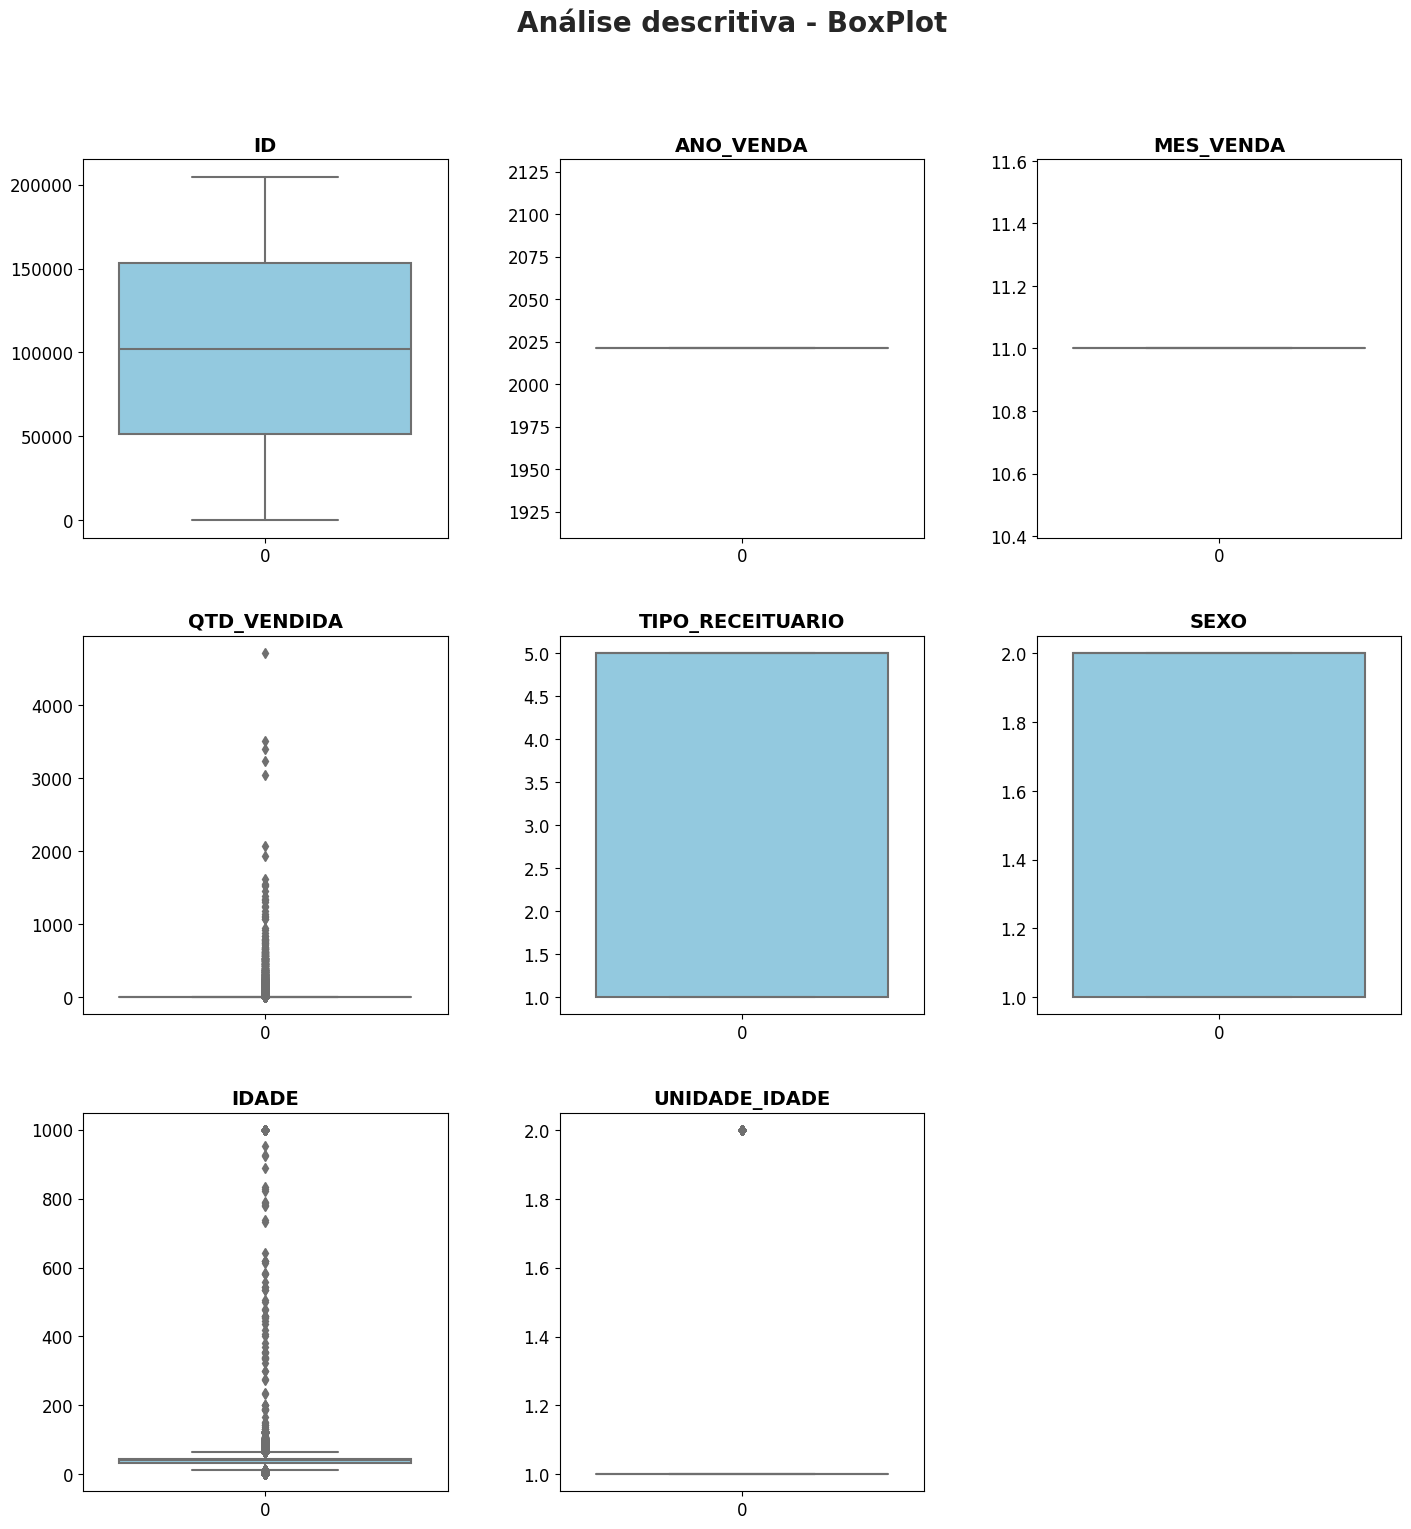

In [ ]:
def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

box_plot(df_med)



###3. Análise exploratória dos Dados

É aqui que conseguiremos tirar de fato oque nosso dataset diz, entender as tendÊncias do mercado, seus deficities, pontos fortes e insights

####3.1 Medicamentos mais vendidos

Numa análise, é fundamental entender como as vendas acontecem e a organização delas. Seja para os produtores de um medicamento, para as farmácias e etc.

In [ ]:
#Para isso, usaremos a coluna 'principio_ativo', que basicamente diferencia um medicamento do outro
qtd_medicamentos = df_med.groupby('PRINCIPIO_ATIVO')
qtd_total_medicamento = qtd_medicamentos['QTD_VENDIDA'].sum().reset_index()

#Ordenando pela quantidade vendida
qtd_total_medicamento = qtd_total_medicamento.sort_values(by='QTD_VENDIDA', ascending=False)



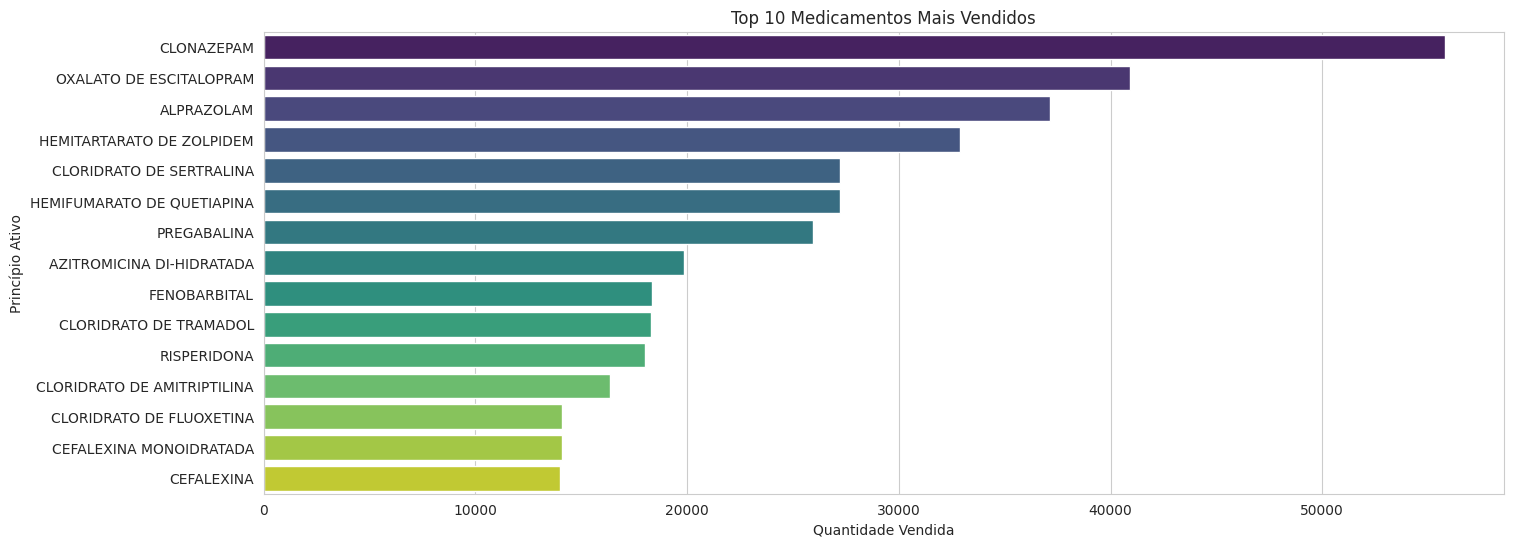

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(x='QTD_VENDIDA', y='PRINCIPIO_ATIVO', data=qtd_total_medicamento.head(15), palette='viridis')
plt.title('Top 10 Medicamentos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Princípio Ativo')
plt.show()

É possível, com esse gráfico, entender alguns pontos importantes:



1.   Identificar o Líder do mercado:
  * É possível perceber que o medicamento mais vendido é o **clonazepam**. Indicando que o medicamento é bem visto no mercado em seus diversos âmbitos, como eficácia, popularidade ou disponibilidade
  * Importantes para o próprio produto, e até para seus competidores, entederem do porque esse medicamento vende tanto, podendo intensificar essas vendas, ou no caso dos concorrentes, encontrarem formas de concorrer


2.   Diversificação de Produto
  * Nota-se que, apesar do **Clonazepam** está com uma boa margem frente aos outros, existe uma grande variabilidade dos produtos, e o mercado é relativamente equilibrado
  * Fundamental essa análise para os empreendedores atuais e novos nesse mercado. Entender como ele se comporta, e como pode agir em meio a esse cenário

3. Potencial de Mercado
  * Identificação de oportunidades de crescimentos são possíveis na visualização desses gráficos, entendendo onde o mercado está saturado, e onde existem brechas para o crescimento



####3.2 Vendas por estado

Além disso, faremos uma análise por estado, para entender melhor esse comportamento geográfico.

Como pode-se ver na nossa função de metadados, apenas 15 estados estão registrados nas vendas nesse dataset.

In [ ]:
qtd_por_estado = df_med.groupby('UF_VENDA')

qtd_total_estado = qtd_por_estado['QTD_VENDIDA'].sum().reset_index()

qtd_total_estado = qtd_total_estado.sort_values(by='QTD_VENDIDA',ascending=False)



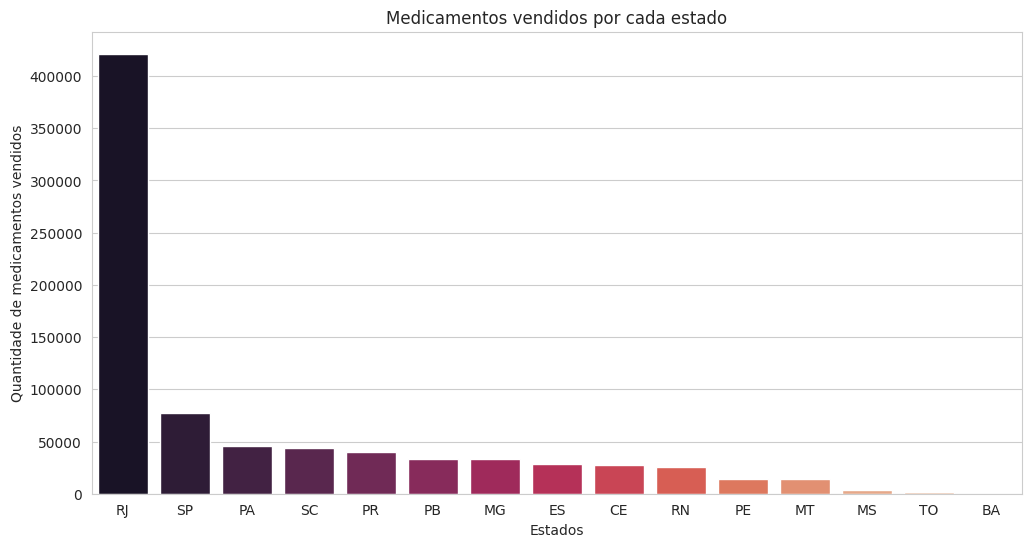

In [ ]:
#Criando o gráfico de barras

plt.figure(figsize=(12,6))
sns.barplot(data=qtd_total_estado, x = 'UF_VENDA', y= 'QTD_VENDIDA', palette='rocket')
plt.title('Medicamentos vendidos por cada estado')
plt.xlabel('Estados')
plt.ylabel('Quantidade de medicamentos vendidos')
plt.show()

É possível tirar alguns insights dessa análise:

1. A taxa de vendas do estado do RJ é muito superior ao resto do país. Isso mostra que o mercado desse estado está saturado nessa região
2. Em contraponto, nota-se que, estados como São Paulo, Minas Gerais e etc, que possuem uma população enorme e bem desenvolvida economicamente, tem muito espaço para evolução e melhoria.

####3.3 Vendas por gênero e por idade

Essas análises são fundamentais para cada produtor/vendedor entender seu público alvo. Algo importante para uma venda mais direcionada e consequentemente eficiente.

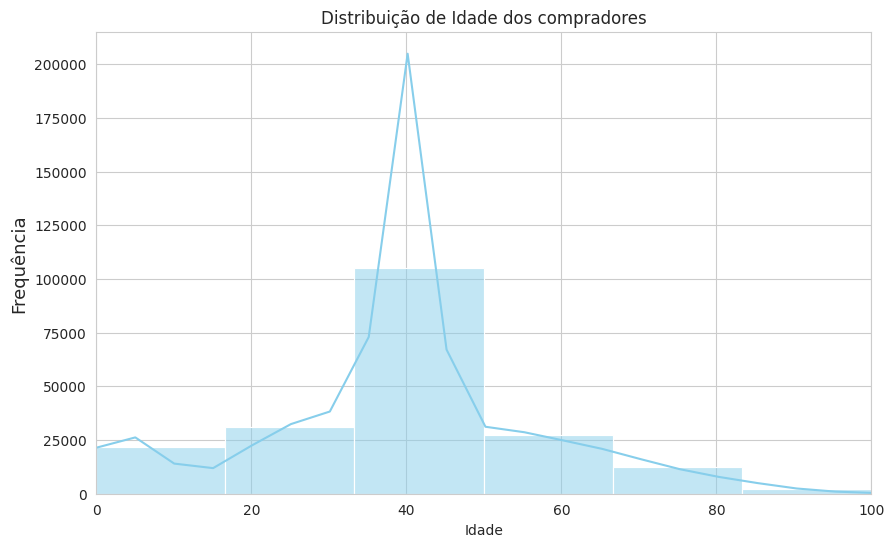

In [ ]:
#Fazendo o histograma das idades

plt.figure(figsize=(10,6))
sns.histplot(df_med['IDADE'], bins=60, kde=True,color='skyblue')
plt.title('Distribuição de Idade dos compradores')
plt.xlabel('Idade')
plt.ylabel('Frequência',fontsize=13)

#Definindo o limite de idade para entre 0 e 10

plt.xlim(0,100)

plt.show()

# Explicando o código.
# O método sns.histplot é utilizado para criar um histograma, que é um tipo de gráfico que mostra a distribuição...
# bins=60: indica o número de barras (ou intervalos) no histograma.
# kde=True: Este parâmetro, quando True, adiciona uma linha KDE (Kernel Density Estimate) ao histograma.

Fazendo a análise por gênero
Nessa análise, o número 1 é o gênero feminino, e o 2 é o gênero masculino

Nesse caso, faremos 2 análises:
1.  Pegaremos os 10 medicamentos mais vendidos, e separaremos eles pelo gênero
2. Pegaremos todo o dataset, e divideremos entre masculino e feminino

Começando pela análise geral:

In [ ]:
#Faremos uma cópia do DataFrame, para colocar 1.0 como feminino e 2.0 como masculino
df_med_genero = df_med.copy()

#Substituindo os valores na coluna 'SEXO'
df_med_genero['SEXO'].replace({1.0: 'Feminino', 2.0: 'Masculino'}, inplace=True)

#Fazendo o agrupamento
qtd_por_genero = df_med_genero.groupby('SEXO')['QTD_VENDIDA'].sum().reset_index()


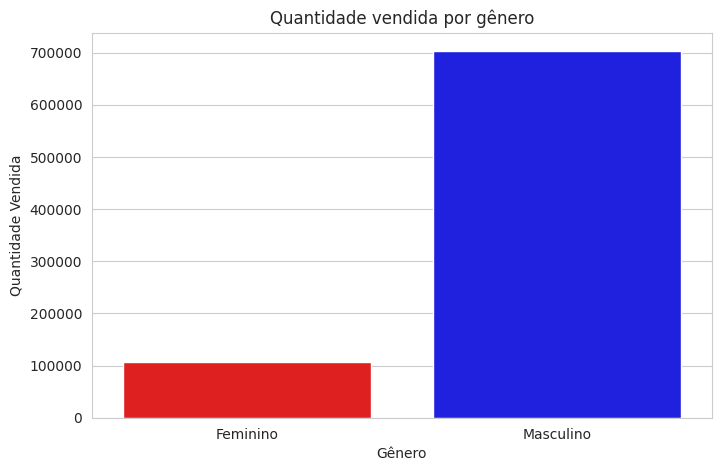

In [ ]:
#Criando o gráfico

#Criando uma paleta de cores
palette = {'Masculino' : 'b', 'Feminino': 'r'}

plt.figure(figsize=(8,5))
sns.barplot(x='SEXO',y='QTD_VENDIDA',data=qtd_por_genero, palette=palette)
plt.title('Quantidade vendida por gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade Vendida')
plt.show()

Agora, a análise será feita considerando os que mais venderam, dividido pelo gênero.

In [ ]:
#Pegar apenas os 10 mais vendidos
top_medicamentos = df_med.groupby('PRINCIPIO_ATIVO')['QTD_VENDIDA'].sum().reset_index()
top_medicamentos = top_medicamentos.sort_values(by='QTD_VENDIDA',ascending=False)

top_medicamentos = top_medicamentos.head(10)

#Agrupação por qtd_Vendida e sexo
grupo_medicamentos_genero = df_med_genero.groupby(['PRINCIPIO_ATIVO', 'SEXO'])['QTD_VENDIDA'].sum().reset_index()

#Filtrando para incluir apenas os top 10 medicamentos
top_medicamentos_genero = grupo_medicamentos_genero[grupo_medicamentos_genero['PRINCIPIO_ATIVO'].isin(top_medicamentos['PRINCIPIO_ATIVO'])]

'''
Explicando essa linha:
grupo_medicamento_genero['PRINCIPIO_ATIVO'] : está acesssando a coluna de nomes dos princípios ativos no DataFrame agrupado por princípio ativo e sexo

top_medicamentos['PRINCIPIO_ATIVO']: está acessando a coluna de nomes dos princípios ativos no DataFrame dos 10 medicamentos mais vendidos

isin(top_medicamentos['PRINCIPIO_ATIVO']): está verificando se cada valor na coluna ['principio ativo'] do dataframe grupo_medicamentos_Genero está presente na [principio_ativo] do DataFrame top_medicamentos

top_medicamentos_genero = grupo_medicamentos_genero[...] está atribuindo novo DataFrame os 10 maiores valores

'''

top_medicamentos_genero

,PRINCIPIO_ATIVO,SEXO,QTD_VENDIDA
19,ALPRAZOLAM,Feminino,1272
20,ALPRAZOLAM,Masculino,35890
79,AZITROMICINA DI-HIDRATADA,Feminino,9602
80,AZITROMICINA DI-HIDRATADA,Masculino,10248
164,CLONAZEPAM,Feminino,1941
165,CLONAZEPAM,Masculino,53840
278,CLORIDRATO DE SERTRALINA,Feminino,755
279,CLORIDRATO DE SERTRALINA,Masculino,26465
293,CLORIDRATO DE TRAMADOL,Feminino,840
294,CLORIDRATO DE TRAMADOL,Masculino,17455


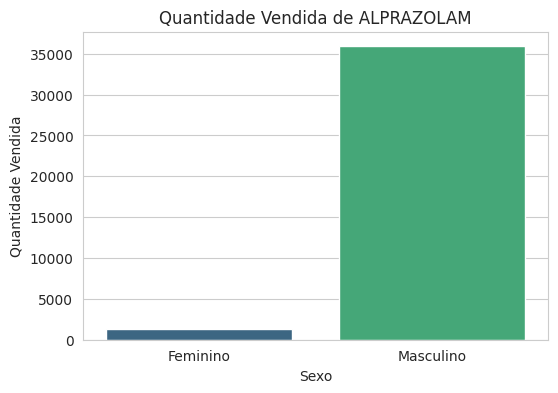

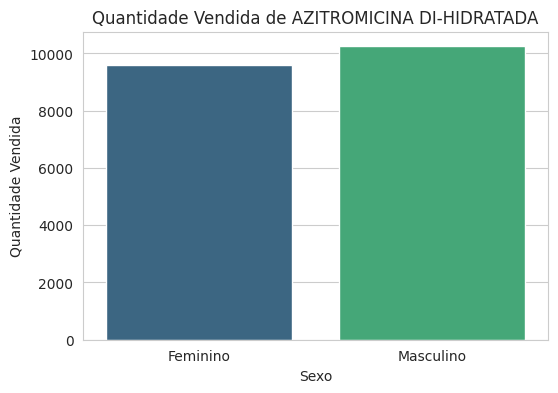

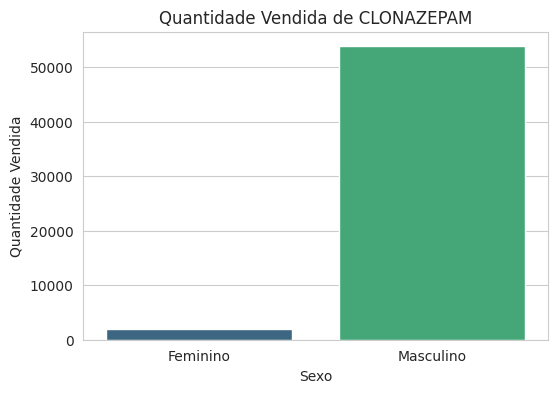

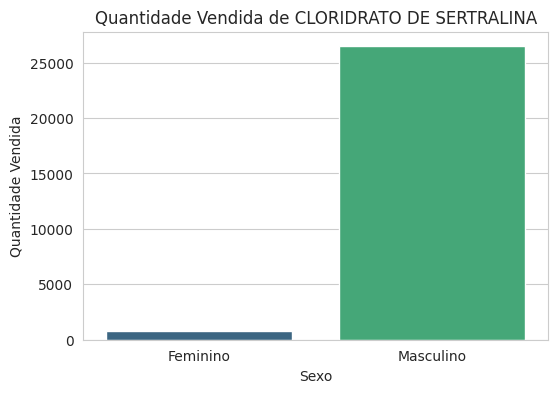

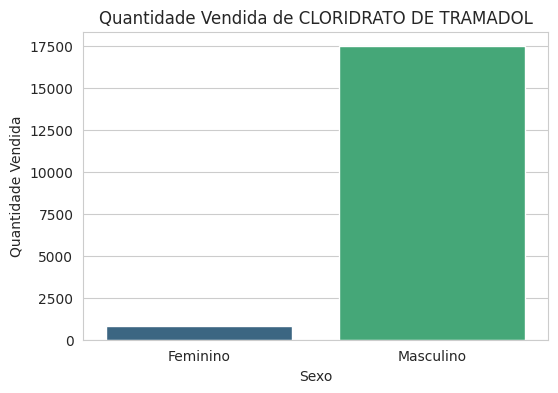

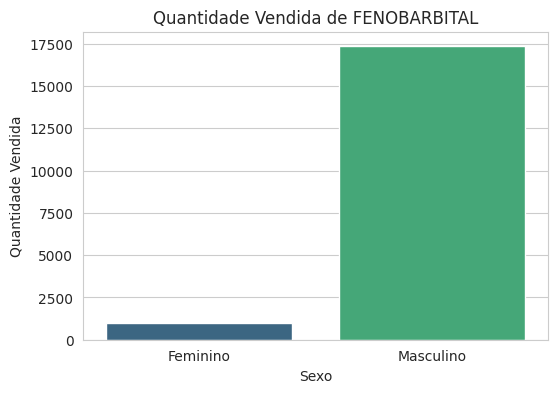

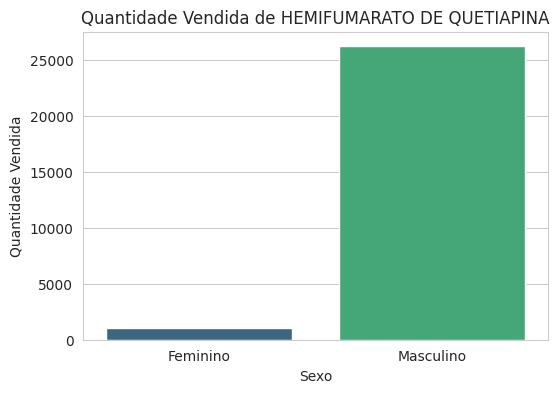

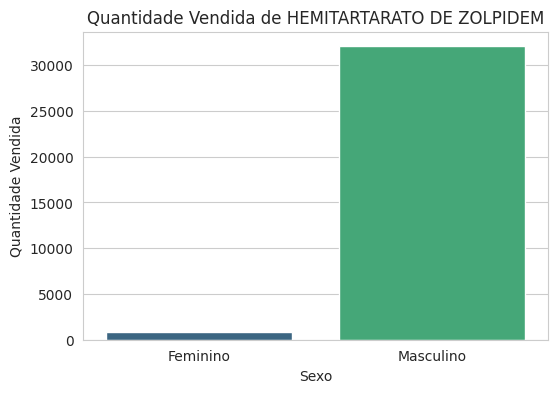

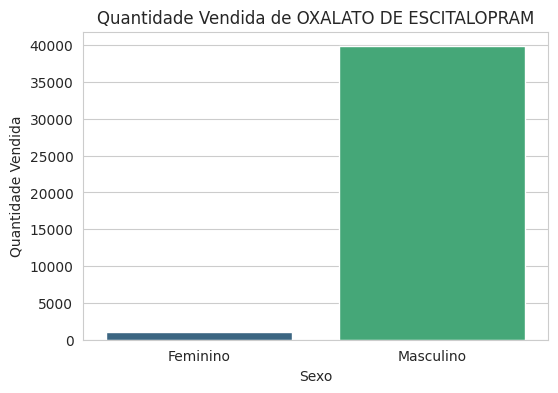

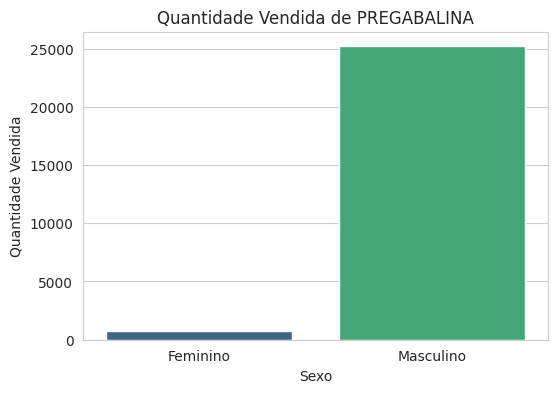

In [ ]:
#Montando o gráfico me barras


for medicamento in top_medicamentos_genero['PRINCIPIO_ATIVO'].unique():

  #Filtra o DataFrame para conter apenas as linhas relativas ao medicamento
  df_medicamento = top_medicamentos_genero[top_medicamentos_genero['PRINCIPIO_ATIVO'] == medicamento]

  plt.figure(figsize=(6,4))

  # Cria um gráfico de barras com separação por sexo
  sns.barplot(x='SEXO', y='QTD_VENDIDA', data=df_medicamento, palette='viridis')

  # Adiciona título e rótulos
  plt.title(f'Quantidade Vendida de {medicamento}')
  plt.xlabel('Sexo')
  plt.ylabel('Quantidade Vendida')

  # Exibe o gráfico
  plt.show()



Com tudo isso relacionado aos gêneros e idades, é possível tirar alguns insights:

* O mercado de compra é dominado pelos homens. Eles apresentam a imensa maioria nesse ramo. A partir dessa informação, as empresas podem trabalhar em duas vertences que ajudariam:
  * Ter uma venda focada no público, com campanhas de marketing, benefíciso e etc voltados para esse gênero, visto que é a grande maioria
  * Em contraponto, o gênero feminino está muito atrás em relação ao masculino, logo, empresas podem criar mecanismo para que essa diferença diminuia, como produtos femininos específicos, como produtos de higiene feminina, suplementos femininos e etc

* As idades, apesar de bem distríbuidas, possuem entre a faixa 30-45, uma grande parte dos compradores. Considerando esse seu maior-público alvo, as fármacias/produtores devem arrumar formas para atingir esse público de forma mais eficitiva.

* Outro ponto interessante é que, mesmo sendo o público com maior necessidade, os idosos estão distantes da maior parcela de compradores, e algumas atitudes podem ser tomadas em relação a isso:
  * Comodidade na entrega: Sabemos que um dos maiores impecilhos para os idosos é o deslocamento e o esforço feito para a compra de variados remédios. O ideal a ser feito é garantir uma forma desse processo ser mais fácil, seja com um delivery acelerado, ou até um drive-thru de medicamentos, em que não seja necessário sair do próprio veículo



